<a href="https://colab.research.google.com/github/Johnpaul10j/emoji-sentiment-dataset/blob/main/emoji_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emoji Sentiment

Are popular emojis generally associated with positive or negative sentiments?

The file `"emoji-sentiment.csv"` provides data on the sentiment associated with various emojis.

Researchers examined 1.6 million tweets across 13 European languages. Each tweet was labeled by annotators as positive (+1), negative (-1), or neutral (0). About 4% of these tweets included emojis.

Columns include:
- `Occurrences [5...max]`: Number of times the emoji appears in the dataset.
- `Position [0...1]`: Average position of the emoji in tweets, from start (0) to end (1).
- `Neg [0...1]`: Percentage of tweets with the emoji that are 'negative'.
- `Neu [0...1]`: Percentage of tweets with the emoji that are 'neutral'.
- `Pos [0...1]`: Percentage of tweets with the emoji that are 'positive'.



In [1]:
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'emoji-sentiment.csv'.

from google.colab import files
uploaded = files.upload()

Saving emoji-sentiment.csv to emoji-sentiment.csv


In [2]:
import pandas as pd
df = pd.read_csv('emoji-sentiment.csv')
df.head()

,Char,Image [twemoji],Unicode codepoint,Occurrences [5...max],Position [0...1],Neg [0...1],Neut [0...1],Pos [0...1],Sentiment bar (c.i. 95%),Unicode name,Unicode block
0,😂,😂,0x1f602,14622,0.805,0.247,0.285,0.468,NaN,FACE WITH TEARS OF JOY,Emoticons
1,❤,❤,0x2764,8050,0.747,0.044,0.166,0.790,NaN,HEAVY BLACK HEART,Dingbats
2,♥,♥,0x2665,7144,0.754,0.035,0.272,0.693,NaN,BLACK HEART SUIT,Miscellaneous Symbols
3,😍,😍,0x1f60d,6359,0.765,0.052,0.219,0.729,NaN,SMILING FACE WITH HEART-SHAPED EYES,Emoticons
4,😭,😭,0x1f62d,5526,0.803,0.436,0.220,0.343,NaN,LOUDLY CRYING FACE,Emoticons


### Project Ideas:

Data Cleaning:
- Remove unnecessary columns that are not useful for your analysis.

- Rename the remaining columns using `snake_case` (all lowercase letters with underscores between words).

New Variables:
- Add a new column called `sentiment`, where sentiment = (% positive tweets) - (% negative tweets).

- Add a `positive_flag` column that is `True` if `sentiment > 0` (or above a set threshold), otherwise `False`.

Types of questions you can now answer more easily:
- What percentage of emojis in the dataset have a positive sentiment?

- What percentage of the top 20 most popular emojis are positive?

- Which emoji (with more than 500 mentions) is the most positive?

- Which emoji (with more than 500 mentions) is the most negative?

- Where in the tweets are most emojis located (i.e. at the beginning or the end)?

- Is there a difference in the placement of positive versus negative emojis within a tweet?

In [3]:
df = df[['Char', 'Occurrences [5...max]', 'Position [0...1]', 'Neg [0...1]', 'Neut [0...1]', 'Pos [0...1]', 'Unicode name']]
df.head()

,Char,Occurrences [5...max],Position [0...1],Neg [0...1],Neut [0...1],Pos [0...1],Unicode name
0,😂,14622,0.805,0.247,0.285,0.468,FACE WITH TEARS OF JOY
1,❤,8050,0.747,0.044,0.166,0.790,HEAVY BLACK HEART
2,♥,7144,0.754,0.035,0.272,0.693,BLACK HEART SUIT
3,😍,6359,0.765,0.052,0.219,0.729,SMILING FACE WITH HEART-SHAPED EYES
4,😭,5526,0.803,0.436,0.220,0.343,LOUDLY CRYING FACE


New Variables:

Add a new column called sentiment, where sentiment = (% positive tweets) - (% negative tweets).

Add a positive_flag column that is True if sentiment > 0 (or above a set threshold), otherwise False

In [4]:
df.columns = ['char', 'occurrences', 'position', 'neg', 'neut', 'pos', 'unicode_name']
df.head()

,char,occurrences,position,neg,neut,pos,unicode_name
0,😂,14622,0.805,0.247,0.285,0.468,FACE WITH TEARS OF JOY
1,❤,8050,0.747,0.044,0.166,0.790,HEAVY BLACK HEART
2,♥,7144,0.754,0.035,0.272,0.693,BLACK HEART SUIT
3,😍,6359,0.765,0.052,0.219,0.729,SMILING FACE WITH HEART-SHAPED EYES
4,😭,5526,0.803,0.436,0.220,0.343,LOUDLY CRYING FACE


In [5]:
df['sentiment'] = df['pos'] - df['neg']
df['positive_flag'] = df['sentiment'] > 0
df.head()

,char,occurrences,position,neg,neut,pos,unicode_name,sentiment,positive_flag
0,😂,14622,0.805,0.247,0.285,0.468,FACE WITH TEARS OF JOY,0.221,True
1,❤,8050,0.747,0.044,0.166,0.790,HEAVY BLACK HEART,0.746,True
2,♥,7144,0.754,0.035,0.272,0.693,BLACK HEART SUIT,0.658,True
3,😍,6359,0.765,0.052,0.219,0.729,SMILING FACE WITH HEART-SHAPED EYES,0.677,True
4,😭,5526,0.803,0.436,0.220,0.343,LOUDLY CRYING FACE,-0.093,False


What percentage of emojis in the dataset have a positive sentiment?

In [6]:
positive_sentiment_percentage = (df['positive_flag'].sum() / len(df)) * 100
print(f"Percentage of emojis with positive sentiment: {positive_sentiment_percentage:.2f}%")

Percentage of emojis with positive sentiment: 82.42%


What percentage of the top 20 most popular emojis are positive?

In [7]:
top_20_emojis = df.nlargest(20, 'occurrences')
positive_top_20_count = top_20_emojis['positive_flag'].sum()
percentage_positive_top_20 = (positive_top_20_count / len(top_20_emojis)) * 100

print(f"Percentage of the top 20 most popular emojis with positive sentiment: {percentage_positive_top_20:.2f}%")

Percentage of the top 20 most popular emojis with positive sentiment: 90.00%


Which emoji (with more than 500 mentions) is the most positive?

In [8]:
emojis_over_500_mentions = df[df['occurrences'] > 500]
most_positive_emoji = emojis_over_500_mentions.nlargest(1, 'sentiment')

print("The most positive emoji with more than 500 mentions is:")
display(most_positive_emoji)

The most positive emoji with more than 500 mentions is:


,char,occurrences,position,neg,neut,pos,unicode_name,sentiment,positive_flag
1,❤,8050,0.747,0.044,0.166,0.79,HEAVY BLACK HEART,0.746,True


Which emoji (with more than 500 mentions) is the most negative?

In [9]:
emojis_over_500_mentions = df[df['occurrences'] > 500]
most_negative_emoji = emojis_over_500_mentions.nsmallest(1, 'sentiment')

print("The most negative emoji with more than 500 mentions is:")
display(most_negative_emoji)

The most negative emoji with more than 500 mentions is:


,char,occurrences,position,neg,neut,pos,unicode_name,sentiment,positive_flag
23,😒,1385,0.858,0.591,0.192,0.217,UNAMUSED FACE,-0.374,False


Where in the tweets are most emojis located (i.e. at the beginning or the end)?

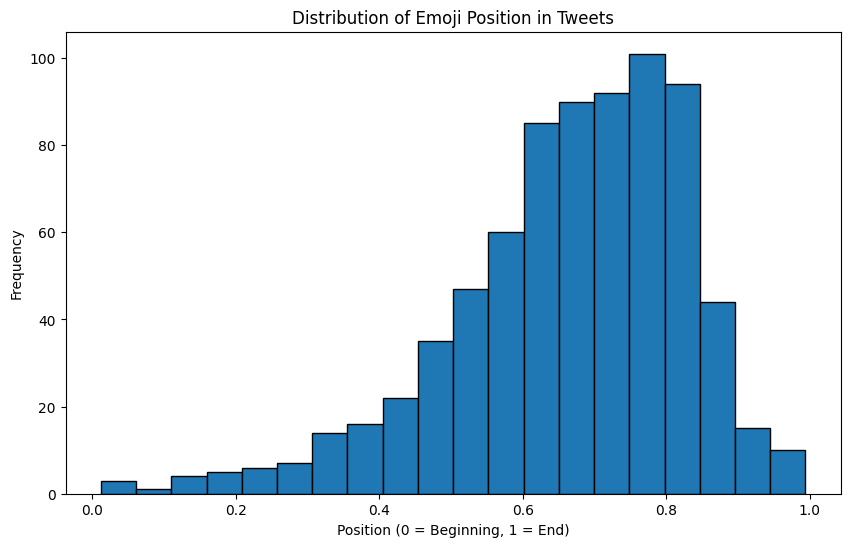

Summary statistics for emoji position:


,position
count,751.000000
mean,0.665549
std,0.164450
min,0.012000
25%,0.575000
50%,0.688000
75%,0.789500
max,0.994000


In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['position'], bins=20, edgecolor='black')
plt.title('Distribution of Emoji Position in Tweets')
plt.xlabel('Position (0 = Beginning, 1 = End)')
plt.ylabel('Frequency')
plt.show()

print("Summary statistics for emoji position:")
display(df['position'].describe())

Is there a difference in the placement of positive versus negative emojis within a tweet?

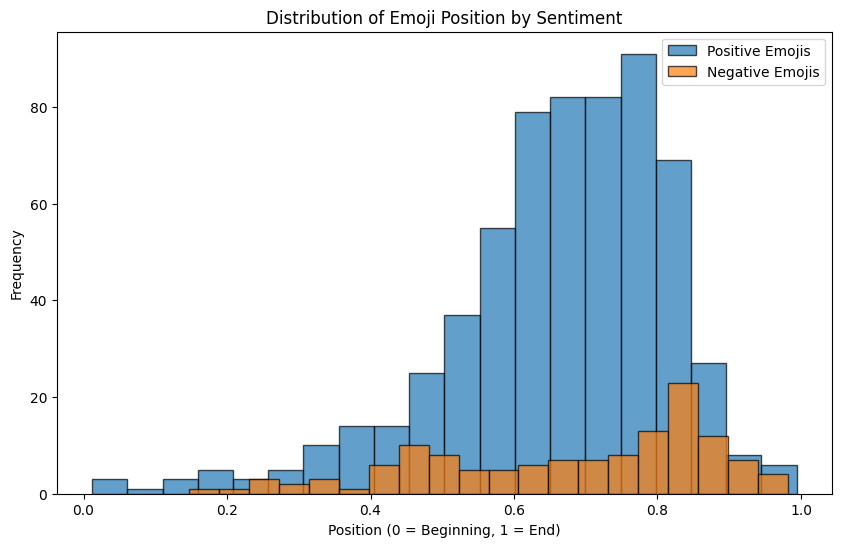

Summary statistics for positive emoji position:


,position
count,619.000000
mean,0.662249
std,0.156747
min,0.012000
25%,0.583000
50%,0.682000
75%,0.779000
max,0.994000



Summary statistics for negative emoji position:


,position
count,132.000000
mean,0.681023
std,0.196543
min,0.147000
25%,0.518250
50%,0.739000
75%,0.841000
max,0.982000


In [11]:
import matplotlib.pyplot as plt

positive_emojis = df[df['positive_flag'] == True]['position']
negative_emojis = df[df['positive_flag'] == False]['position']

plt.figure(figsize=(10, 6))
plt.hist(positive_emojis, bins=20, alpha=0.7, label='Positive Emojis', edgecolor='black')
plt.hist(negative_emojis, bins=20, alpha=0.7, label='Negative Emojis', edgecolor='black')
plt.title('Distribution of Emoji Position by Sentiment')
plt.xlabel('Position (0 = Beginning, 1 = End)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Summary statistics for positive emoji position:")
display(positive_emojis.describe())

print("\nSummary statistics for negative emoji position:")
display(negative_emojis.describe())